In [1]:
from math import *
import math
import csv
import matplotlib.pyplot as plt
from scipy.misc import derivative
from scipy.optimize import curve_fit

In [2]:
def euclid_algo(x, y, verbose=True):
	if x < y: # We want x >= y
		return euclid_algo(y, x, verbose)
	print()
	while y != 0:
		if verbose: print('%s = %s * %s + %s' % (x, floor(x/y), y, x % y))
        #I guess an if loop speeds things up for some reason
        #x % y = remainder after division
		(x, y) = (y, x % y)
	
	if verbose: print('gcd is %s' % x) 
	return x

In [3]:
def euclid_algo_basic(x, y):
    if x < y: # We want x >= y
      return euclid_algo_basic(y, x)
    while y != 0:
      (x, y) = (y, x % y)
    return x

In [4]:
'''Now to find the first few primes'''
'''The input is (Primes up to this integer, True to save)'''
def firstprimes(N, savequestion = False):
    if not isinstance(N, int):
        return "N is not an integer"
    if N<3:
        return None
    p = 3
    #S will denote the set of primes found so far
    S = [2]
    while p < N+1:
        check = True
        kons = math.floor(N**0.5) #we won't need to check for divisors over sqrt N - this gets us a O(N) process
        #Will set check = True and conclude primality only if we don't find
        #a divisor and change check to False
        for x in {y if y<= kons else 2 for y in S}:
            if euclid_algo_basic(x, p) !=1 :
                check = False
                break
        if check:
            S.append(p)
        p += 2
    if savequestion:
        with open('Primes less than or equal to %s' % N, 'w') as csv_file:
            csv_writer = csv.writer(csv_file, delimiter=',')
            csv_writer.writerow(S)
    return print("The primes less than %s are " % N, S)

In [5]:
def firstprimes_set(N):
    if not isinstance(N, int):
        return "N is not an integer"
    if N<3:
        return None
    p = 3
    #S will denote the set of primes found so far
    S = [2]
    while p < N+1:
        check = True
        kons = math.floor(N**0.5) #we won't need to check for divisors over sqrt N - this gets us a O(N) process
        #Will set check = True and conclude primality only if we don't find
        #a divisor and change check to False
        for x in {y if y<= kons else 2 for y in S}:
            if euclid_algo_basic(x, p) !=1 :
                check = False
                break
        if check:
            S.append(p)
        p += 2
    return S

In [6]:
firstprimes(1030, False)

The primes less than 1030 are  [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997, 1009, 1013, 1019, 1021]


## Prime Differences

I develop here some tools to generate differences between consecutive primes

In [5]:
def prime_diff(N):
    if not isinstance(N, int):
        return "N is not an integer"
    if N<3:
        return None
    p = 3
    #S will denote the set of primes found so far
    S = [2]
    while p < N+1:
        check = True
        kons = math.floor(N**0.5) #we won't need to check for divisors over sqrt N - this gets us a O(N) process
        #Will set check = True and conclude primality only if we don't find
        #a divisor and change check to False
        for x in {y if y<= kons else 2 for y in S}:
            if euclid_algo_basic(x, p) !=1 :
                check = False
                break
        if check:
            S.append(p)
        p += 2
    D = [S[i+1] - S[i] for i in range(len(S) - 1)]
    return D

In [40]:
def diff_hist(N):
    if not isinstance(N, int):
        raise TypeError("N is not an integer")
    if N<5:
        raise Exception("Choose Larger N")
    D = prime_diff(N)
    plt.hist(D, [i for i in range(max(D) + 1)], range = (min(D), max(D)))
    return None

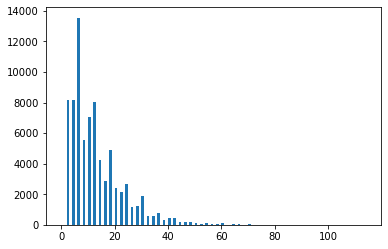

In [42]:
diff_hist(1000000)

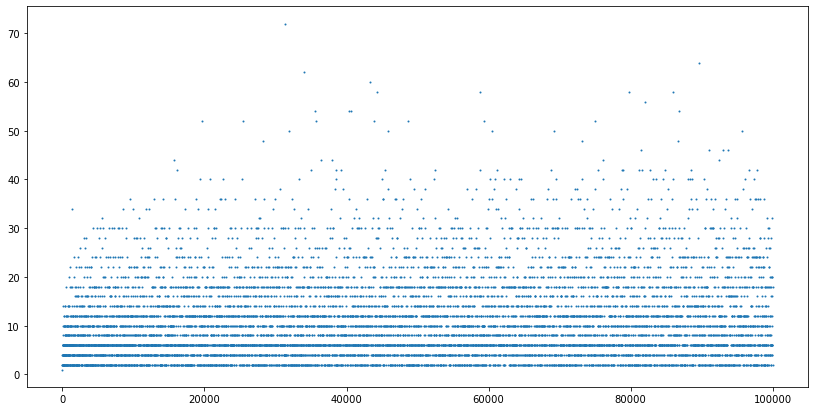

In [30]:
top_n = 100000
firstprimeset = firstprimes_set(top_n)
firstprimeset.pop()
plt.figure(figsize = (14,7))
plt.scatter(firstprimeset, prime_diff(top_n), s=1)

## Fitting a density function to primes

Let us build a generator with the asymptotic tendancy given by the prime number theorem: $\pi (N) \sim \frac{N}{\log N}$, so

$\frac{d\frac{\pi}{N}}{dN} \sim - \frac{1}{(\log N)^2}$

Perhaps an adaptive regime can be generated using this alongside the asymptotic

$\mathbb{E}[gap](N) \sim \log N$

To begin with, we fit numeric derivative functions of $- \frac{1}{(\log N)^2}$ to the density function. This uses `scipy.misc.derivative` https://scipy.github.io/devdocs/reference/generated/scipy.misc.derivative.html?highlight=derivative#scipy.misc.derivative

In [6]:
f0 = lambda N: -(1/math.log(N))**2
f1 = lambda N: derivative(f0, N, dx = 0.01, n=1)

In [7]:
x_ = list(range(2,99))
f0_ = [-f0(n) for n in x_]
f1_ = [f1(n) for n in x_]
# plt.plot(x_, f0_, label="f0")
# plt.plot(x_, f1_, label="f1")
# plt.legend()

In [8]:
def density_gen(top=50000, period=20):
    x_ = list(range(period, top-period))
    S = firstprimes_set(top)
    T = []
    for x in x_:
        counter = 0
        for y in S:
            if y < x-period:
                S.remove(y)
            elif y > x+period:
                break # potential source of flaws
            else:
                counter += 1
        T.append(counter/(2*period))
    return x_, T
    

In [18]:
Fmodel = lambda N_, a, b: [a*f0(N) + b*f1(N) for N in N_]
TopN = 150000
per = 30
x_, Fdata = density_gen(top = TopN, period = per)
coeff_tuple, _ = curve_fit(Fmodel, x_, Fdata)

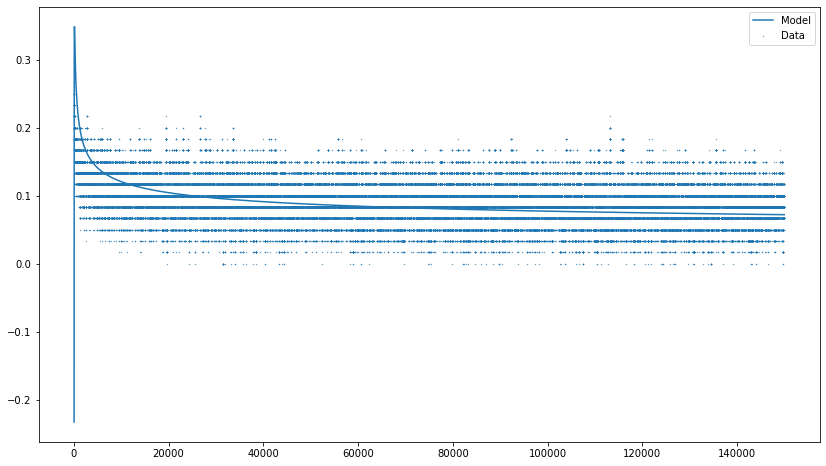

In [19]:
plt.figure(figsize = (14,8))
plt.scatter(x_, Fdata, label = "Data", s = 0.1)
plt.plot(x_, Fmodel(x_, coeff_tuple[0], coeff_tuple[1]), label= "Model")
plt.legend()

Now let's fit higher order functions

In [ ]:
#Now we can do a multiplot to see if higher orders will work, 
#or use the basic model to assist the ML trial, or model the density stochastically